In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df =  pd.read_csv("results.csv") #games between national teams
df["date"] = pd.to_datetime(df["date"])
df = df[(df["date"] >= "2018-8-1")].reset_index(drop=True) #games at the 2022 wc cycle
df_wc = df #pre-wc outcomes

rank = pd.read_csv("fifa_ranking.csv") #rankings
rank["rank_date"] = pd.to_datetime(rank["rank_date"]) 
rank = rank[(rank["rank_date"] >= "2018-8-1")].reset_index(drop=True) #selecting games from the 2022 wc cycle
######### IR Iran = Iran , Korea Republic = South Korea, USA = United States
rank["country_full"] = rank["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", "United States")
rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()
rank_wc = rank #dataframe with rankings

#Making the merge
df_wc_ranked = df_wc.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1)
df_wc_ranked = df_wc_ranked.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1)


In [20]:
df.head()

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1,target
0,2018-08-26,Barbados,Cuba,160.0,181.0,0.0,0.0,2,-21.0,0.0,...,1.0,0.018519,0.018519,0.0,0.0,0.000000,0.000000,0,1,1
1,2018-08-29,Barbados,Cuba,160.0,181.0,0.0,2.0,1,-21.0,0.0,...,1.0,0.012022,0.012022,0.5,0.5,0.003125,0.003125,0,1,1
2,2018-09-06,Mongolia,Guam,186.0,190.0,1.0,1.0,2,-4.0,0.0,...,3.0,0.016216,0.016216,0.0,0.0,0.000000,0.000000,1,0,1
3,2018-09-06,Nepal,Bhutan,161.0,183.0,4.0,0.0,0,-22.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1,0,0
4,2018-09-06,Bangladesh,Pakistan,194.0,201.0,1.0,0.0,0,-7.0,0.0,...,1.5,0.008197,0.008197,3.0,3.0,0.018634,0.018634,1,0,0


In [8]:
rank

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
0,2018-08-16,145.0,Afghanistan,AFG,1068.00,1068.00,0.0,AFC
1,2018-08-17,145.0,Afghanistan,AFG,1068.00,1068.00,0.0,AFC
2,2018-08-18,145.0,Afghanistan,AFG,1068.00,1068.00,0.0,AFC
3,2018-08-19,145.0,Afghanistan,AFG,1068.00,1068.00,0.0,AFC
4,2018-08-20,145.0,Afghanistan,AFG,1068.00,1068.00,0.0,AFC
...,...,...,...,...,...,...,...,...
338065,2022-12-18,125.0,Zimbabwe,ZIM,1138.56,1138.56,2.0,CAF
338066,2022-12-19,125.0,Zimbabwe,ZIM,1138.56,1138.56,2.0,CAF
338067,2022-12-20,125.0,Zimbabwe,ZIM,1138.56,1138.56,2.0,CAF
338068,2022-12-21,125.0,Zimbabwe,ZIM,1138.56,1138.56,2.0,CAF


In [10]:
df_wc_ranked

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
0,2018-08-18,Andorra,United Arab Emirates,0,0,Friendly,Grödig,Austria,True,1120.00,1120.00,130.0,0.0,1312.00,1312.00,77.0,0.0
1,2018-08-18,Grenada,Jamaica,1,5,Friendly,St. George's,Grenada,False,980.00,980.00,168.0,0.0,1400.00,1400.00,54.0,0.0
2,2018-08-18,Guatemala,Cuba,1,0,Friendly,Quetzaltenango,Guatemala,False,1064.00,1064.00,146.0,0.0,940.00,940.00,181.0,0.0
3,2018-08-20,Barbados,Jamaica,2,2,Friendly,Bridgetown,Barbados,False,1005.00,1008.00,160.0,0.0,1400.00,1400.00,54.0,0.0
4,2018-08-26,Barbados,Cuba,0,0,Friendly,Bridgetown,Barbados,False,1005.00,1008.00,160.0,0.0,940.00,940.00,181.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489,2022-12-14,Malaysia,Maldives,3,0,Friendly,Kuala Lumpur,Malaysia,False,1062.32,1057.59,146.0,-2.0,1026.09,1018.25,154.0,-2.0
3490,2022-12-14,Vietnam,Philippines,1,0,Friendly,Hanoi,Vietnam,False,1226.65,1218.84,96.0,-1.0,1115.13,1115.13,133.0,-1.0
3491,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True,1645.64,1632.15,12.0,-3.0,1563.50,1558.35,22.0,-1.0
3492,2022-12-17,Singapore,Maldives,3,1,Friendly,Singapore,Singapore,False,1003.50,1004.75,160.0,1.0,1026.09,1018.25,154.0,-2.0


In [24]:
df2 = pd.read_csv("full_db.csv")
df2

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1
0,2018-08-26,Barbados,Cuba,160.0,181.0,0.0,0.0,2,-21.0,0.0,...,1.000000,1.0,0.018519,0.018519,0.000000,0.0,0.000000,0.000000,0,1
1,2018-08-29,Barbados,Cuba,160.0,181.0,0.0,2.0,1,-21.0,0.0,...,1.000000,1.0,0.012022,0.012022,0.500000,0.5,0.003125,0.003125,0,1
2,2018-09-06,Mongolia,Guam,186.0,190.0,1.0,1.0,2,-4.0,0.0,...,3.000000,3.0,0.016216,0.016216,0.000000,0.0,0.000000,0.000000,1,0
3,2018-09-06,Nepal,Bhutan,161.0,183.0,4.0,0.0,0,-22.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1,0
4,2018-09-06,Bangladesh,Pakistan,194.0,201.0,1.0,0.0,0,-7.0,0.0,...,1.500000,1.5,0.008197,0.008197,3.000000,3.0,0.018634,0.018634,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,2022-09-27,Albania,Iceland,66.0,63.0,1.0,1.0,2,3.0,0.0,...,1.365854,0.6,0.019776,0.007318,1.120000,1.8,0.035917,0.021851,1,0
3196,2022-09-27,Norway,Serbia,36.0,25.0,0.0,2.0,1,11.0,0.0,...,1.833333,2.0,0.041984,0.090235,1.866667,2.0,0.053327,0.073887,1,0
3197,2022-09-27,Sweden,Slovenia,20.0,65.0,1.0,1.0,2,-45.0,0.0,...,1.607843,0.6,0.048520,0.009231,1.404762,1.0,0.026035,0.029545,1,0
3198,2022-09-27,Kosovo,Cyprus,106.0,108.0,5.0,1.0,0,-2.0,0.0,...,1.326087,1.2,0.018478,0.016825,0.767442,1.0,0.009687,0.019652,1,0


In [25]:
def no_draw(x):
    if x == 2:
        return 1
    else:
        return x
    
df2["target"] = df2["result"].apply(lambda x: no_draw(x))

In [26]:
df_model = df2.drop(["result"], axis=1)

In [27]:
df2.columns[8:15]

Index(['rank_dif', 'rank_change_home', 'rank_change_away', 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5'],
      dtype='object')

In [28]:
data1 = df2[list(df2.columns[8:20].values) + ["target"]]
data2 = df2[df2.columns[20:]]

In [29]:
scaled = (data1[:-1] - data1[:-1].mean()) / data1[:-1].std()
scaled["target"] = data1["target"]
violin1 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

In [30]:
scaled = (data2[:-1] - data2[:-1].mean()) / data2[:-1].std()
scaled["target"] = data2["target"]
violin2 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

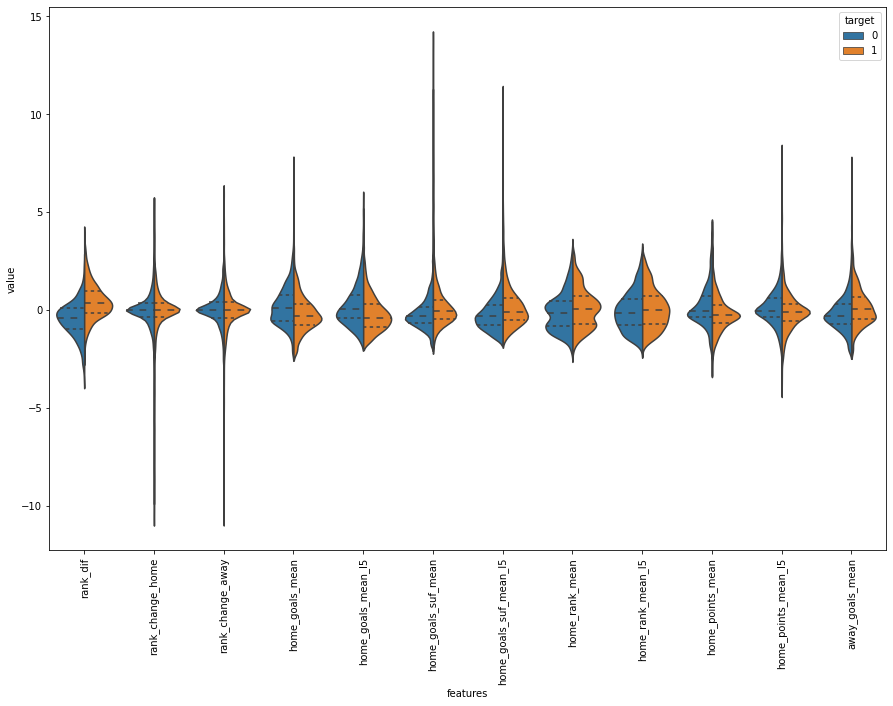

In [33]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin1,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

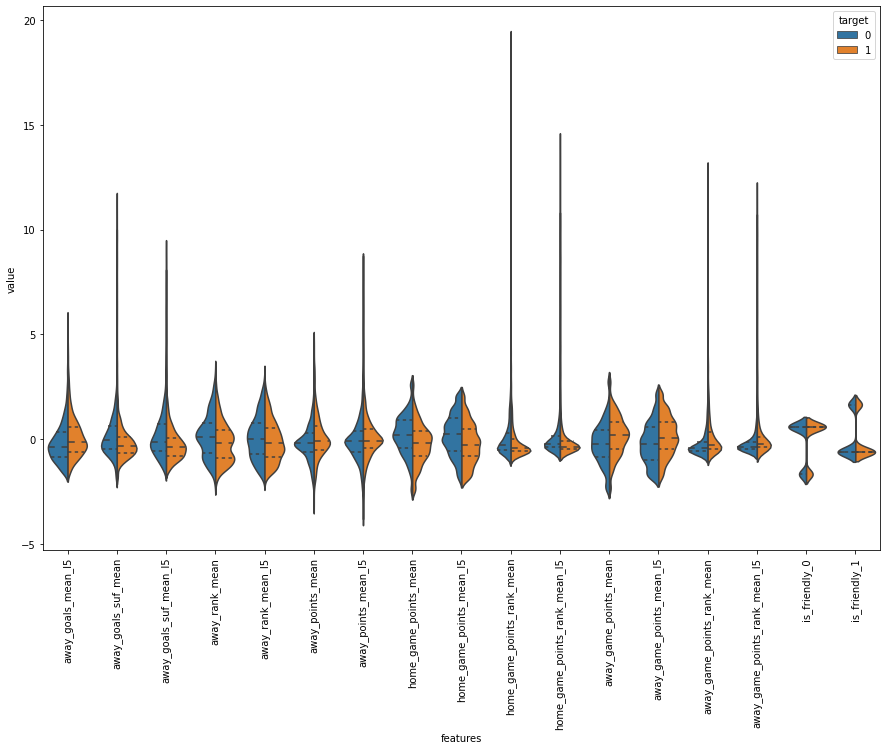

In [34]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin2,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

In [36]:
dif = df2.copy()
dif.loc[:, "goals_dif"] = dif["home_goals_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_mean_l5"]
dif.loc[:, "goals_suf_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_suf_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "goals_made_suf_dif"] = dif["home_goals_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_made_suf_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "goals_suf_made_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_suf_made_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_mean_l5"]

In [37]:
data_difs = dif.iloc[:, -8:]

In [38]:

scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["target"] = data2["target"]
violin = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'goals_dif'),
  Text(1, 0, 'goals_dif_l5'),
  Text(2, 0, 'goals_suf_dif'),
  Text(3, 0, 'goals_suf_dif_l5'),
  Text(4, 0, 'goals_made_suf_dif'),
  Text(5, 0, 'goals_made_suf_dif_l5'),
  Text(6, 0, 'goals_suf_made_dif'),
  Text(7, 0, 'goals_suf_made_dif_l5')])

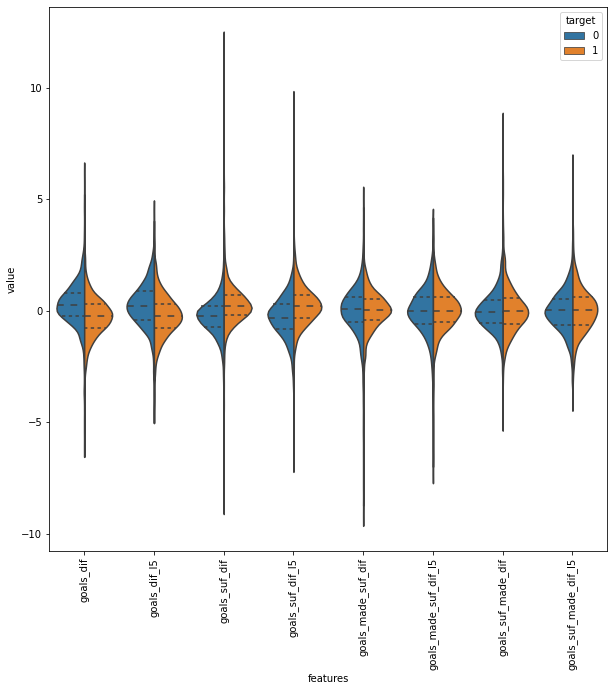

In [39]:
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)

In [40]:
dif.columns

Index(['date', 'home_team', 'away_team', 'rank_home', 'rank_away',
       'home_score', 'away_score', 'result', 'rank_dif', 'rank_change_home',
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_l5',
       'home_goals_suf_mean', 'home_goals_suf_mean_l5', 'home_rank_mean',
       'home_rank_mean_l5', 'home_points_mean', 'home_points_mean_l5',
       'away_goals_mean', 'away_goals_mean_l5', 'away_goals_suf_mean',
       'away_goals_suf_mean_l5', 'away_rank_mean', 'away_rank_mean_l5',
       'away_points_mean', 'away_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5', 'is_friendly_0', 'is_friendly_1',
       'target', 'goals_dif', 'goals_dif_l5', 'goals_suf_dif',
       'goals_suf_dif_l5', 'goals_made_suf_dif', 'goals_made_suf_dif_l5',
       'goals_suf_m

In [41]:
dif.loc[:, "dif_points"] = dif["home_game_points_mean"] - dif["away_game_points_mean"]
dif.loc[:, "dif_points_l5"] = dif["home_game_points_mean_l5"] - dif["away_game_points_mean_l5"]
dif.loc[:, "dif_points_rank"] = dif["home_game_points_rank_mean"] - dif["away_game_points_rank_mean"]
dif.loc[:, "dif_points_rank_l5"] = dif["home_game_points_rank_mean_l5"] - dif["away_game_points_rank_mean_l5"]

In [42]:
dif.loc[:, "dif_rank_agst"] = dif["home_rank_mean"] - dif["away_rank_mean"]
dif.loc[:, "dif_rank_agst_l5"] = dif["home_rank_mean_l5"] - dif["away_rank_mean_l5"]

In [43]:
dif.loc[:, "goals_per_ranking_dif"] = (dif["home_goals_mean"] / dif["home_rank_mean"]) - (dif["away_goals_mean"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_suf_dif"] = (dif["home_goals_suf_mean"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_dif_l5"] = (dif["home_goals_mean_l5"] / dif["home_rank_mean"]) - (dif["away_goals_mean_l5"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_suf_dif_l5"] = (dif["home_goals_suf_mean_l5"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean_l5"] / dif["away_rank_mean"])

In [44]:
dif.iloc[:,-10:]

,dif_points,dif_points_l5,dif_points_rank,dif_points_rank_l5,dif_rank_agst,dif_rank_agst_l5,goals_per_ranking_dif,goals_per_ranking_suf_dif,goals_per_ranking_dif_l5,goals_per_ranking_suf_dif_l5
0,1.000000,1.0,0.018519,0.018519,-92.000000,-92.0,0.037037,0.030188,0.037037,0.030188
1,0.500000,0.5,0.008897,0.008897,-35.500000,-35.5,0.008511,0.005243,0.008511,0.005243
2,3.000000,3.0,0.016216,0.016216,0.000000,0.0,0.021622,-0.005405,0.021622,-0.005405
3,0.000000,0.0,0.000000,0.000000,7.000000,7.0,0.004975,-0.000359,0.004975,-0.000359
4,-1.500000,-1.5,-0.010437,-0.010437,30.500000,30.5,-0.007200,-0.003600,-0.007200,-0.003600
...,...,...,...,...,...,...,...,...,...,...
3195,0.245854,-1.2,-0.016141,-0.014533,21.632683,-14.8,-0.005083,-0.015460,-0.016394,-0.004593
3196,-0.033333,0.0,-0.011343,0.016348,9.014286,-3.4,-0.005282,-0.006512,-0.018312,-0.002601
3197,0.203081,-0.4,0.022485,-0.020314,-25.102241,10.2,0.009459,0.009092,0.010316,0.015447
3198,0.558645,0.2,0.008791,-0.002827,7.037917,1.6,0.007625,-0.008259,0.006972,-0.001806


In [45]:
data_difs = dif.iloc[:, -10:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["target"] = data2["target"]
violin = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

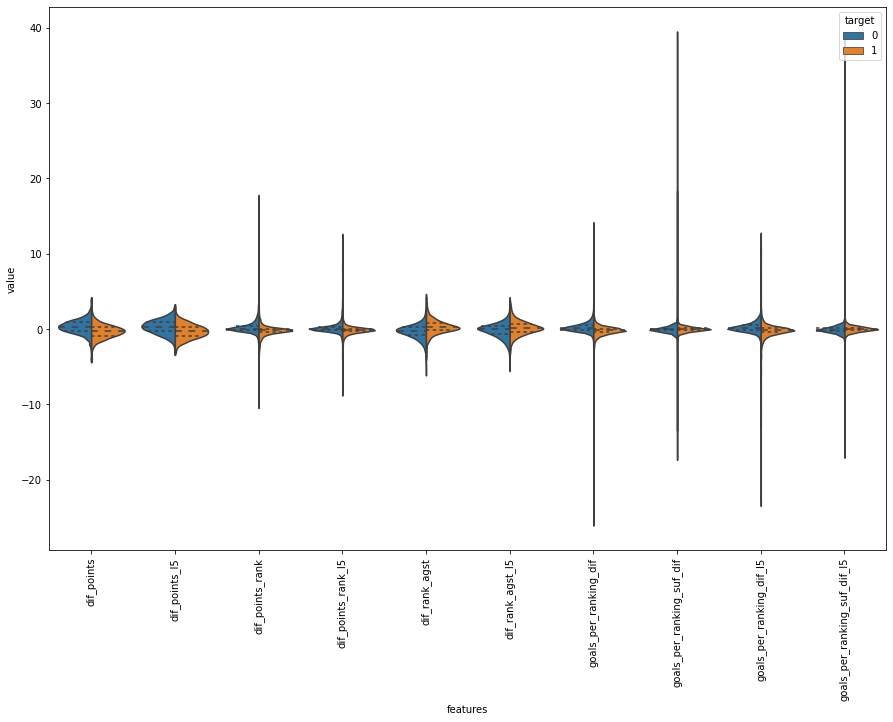

In [46]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'dif_points'),
  Text(1, 0, 'dif_points_l5'),
  Text(2, 0, 'dif_points_rank'),
  Text(3, 0, 'dif_points_rank_l5'),
  Text(4, 0, 'dif_rank_agst'),
  Text(5, 0, 'dif_rank_agst_l5'),
  Text(6, 0, 'goals_per_ranking_dif'),
  Text(7, 0, 'goals_per_ranking_suf_dif'),
  Text(8, 0, 'goals_per_ranking_dif_l5'),
  Text(9, 0, 'goals_per_ranking_suf_dif_l5')])

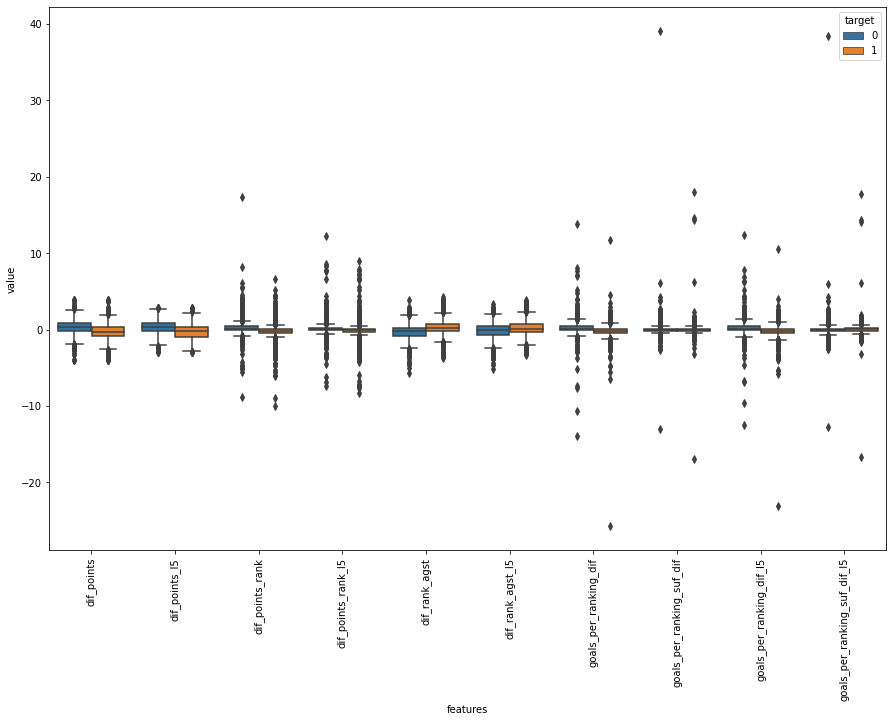

In [47]:
plt.figure(figsize=(15,10))
sns.boxplot(x="features", y="value", hue="target", data=violin)
plt.xticks(rotation=90)

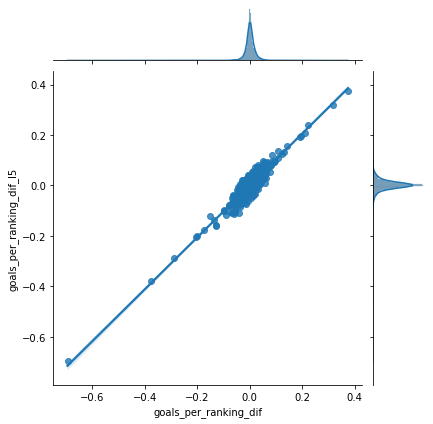

In [48]:
sns.jointplot(data = data_difs, x = 'goals_per_ranking_dif', y = 'goals_per_ranking_dif_l5', kind="reg")
plt.show()

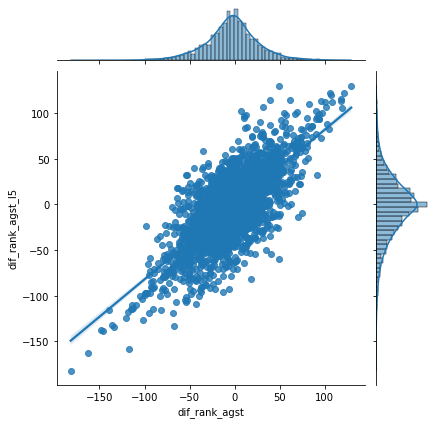

In [49]:
sns.jointplot(data = data_difs, x = 'dif_rank_agst', y = 'dif_rank_agst_l5', kind="reg")
plt.show()

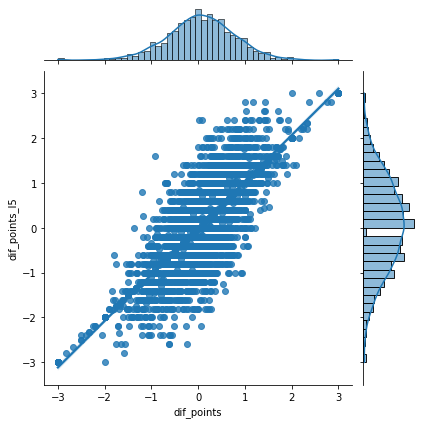

In [50]:
sns.jointplot(data = data_difs, x = 'dif_points', y = 'dif_points_l5', kind="reg")
plt.show()

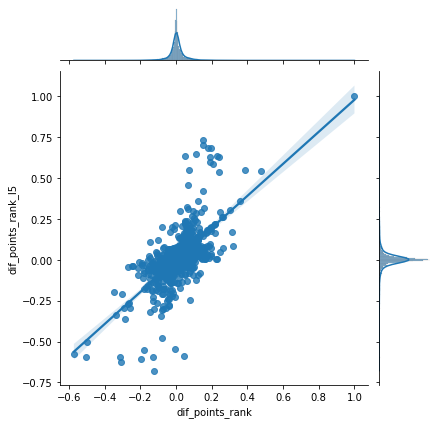

In [51]:
sns.jointplot(data = data_difs, x = 'dif_points_rank', y = 'dif_points_rank_l5', kind="reg")
plt.show()

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [57]:
df = pd.read_csv("model_db.csv")
df

,home_team,away_team,target,rank_dif,goals_dif,goals_dif_l5,goals_suf_dif,goals_suf_dif_l5,goals_per_ranking_dif,dif_rank_agst,dif_rank_agst_l5,dif_points_rank,dif_points_rank_l5,is_friendly_0,is_friendly_1
0,Barbados,Cuba,1,-21.0,2.000000,2.0,1.000000,1.0,0.037037,-92.000000,-92.0,0.018519,0.018519,0,1
1,Barbados,Cuba,1,-21.0,1.000000,1.0,0.500000,0.5,0.008511,-35.500000,-35.5,0.008897,0.008897,0,1
2,Mongolia,Guam,1,-4.0,4.000000,4.0,-1.000000,-1.0,0.021622,0.000000,0.0,0.016216,0.016216,1,0
3,Nepal,Bhutan,0,-22.0,1.000000,1.0,0.000000,0.0,0.004975,7.000000,7.0,0.000000,0.000000,1,0
4,Bangladesh,Pakistan,0,-7.0,-1.000000,-1.0,-0.500000,-0.5,-0.007200,30.500000,30.5,-0.010437,-0.010437,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,Albania,Iceland,1,3.0,-0.002439,-0.8,-0.584878,0.0,-0.005083,21.632683,-14.8,-0.016141,-0.014533,1,0
3196,Norway,Serbia,1,11.0,-0.038095,-0.8,-0.230159,0.0,-0.005282,9.014286,-3.4,-0.011343,0.016348,1,0
3197,Sweden,Slovenia,1,-45.0,0.030812,0.2,0.137255,0.2,0.009459,-25.102241,10.2,0.022485,-0.020314,1,0
3198,Kosovo,Cyprus,0,-2.0,0.667341,0.6,-0.463094,0.0,0.007625,7.037917,1.6,0.008791,-0.002827,1,0


In [58]:
X = df.iloc[:, 3:]
y = df[["target"]]
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

gb = GradientBoostingClassifier(random_state=5)

params = {"learning_rate": [0.01, 0.1, 0.5],
            "min_samples_split": [5, 10],
            "min_samples_leaf": [3, 5],
            "max_depth":[3,5,10],
            "max_features":["sqrt"],
            "n_estimators":[100, 200]
         } 

gb_cv = GridSearchCV(gb, params, cv = 3, n_jobs = -1, verbose = 20)

gb_cv.fit(X_train, np.ravel(y_train))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             verbose=20)

In [59]:
gb_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_features='sqrt',
                           min_samples_leaf=3, min_samples_split=5,
                           n_estimators=200, random_state=5)

In [60]:
gb = gb_cv.best_estimator_

In [61]:
params_rf = {"max_depth": [20],
                "min_samples_split": [10],
                "max_leaf_nodes": [175],
                "min_samples_leaf": [5],
                "n_estimators": [250],
                 "max_features": ["sqrt"],
                }

rf = RandomForestClassifier(random_state=1)

rf_cv = GridSearchCV(rf, params_rf, cv = 3, n_jobs = -1, verbose = False)

rf_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [20], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [175], 'min_samples_leaf': [5],
                         'min_samples_split': [10], 'n_estimators': [250]},
             verbose=False)

In [63]:
rf = rf_cv.best_estimator_

In [64]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

def analyze(model):
    # Set custom colors for the graphs
    color_test = 'blue'
    color_train = 'green'

    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test.values)[:, 1])  # test AUC
    plt.figure(figsize=(15, 8))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, color=color_test, label="test")


    fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train.values)[:, 1])  # train AUC
    plt.plot(fpr_train, tpr_train, color=color_train, label="train")
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test.values)[:, 1])
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train.values)[:, 1])
    plt.legend()
    plt.title('AUC score is %.2f on test and %.2f on training' % (auc_test, auc_train))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(13, 10))
    cm = confusion_matrix(y_test, model.predict(X_test.values))
    sns.heatmap(cm, annot=True, fmt="d", cmap="BuGn_r")
    plt.title('Confusion Matrix')
    plt.show()


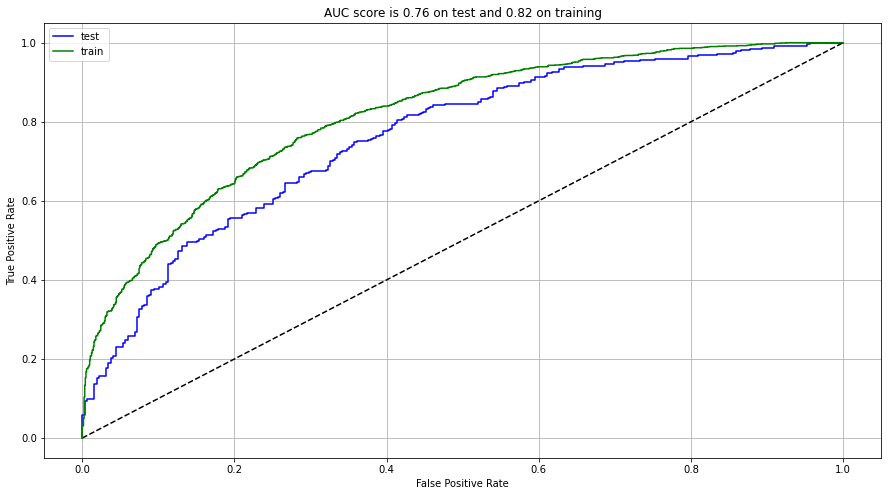

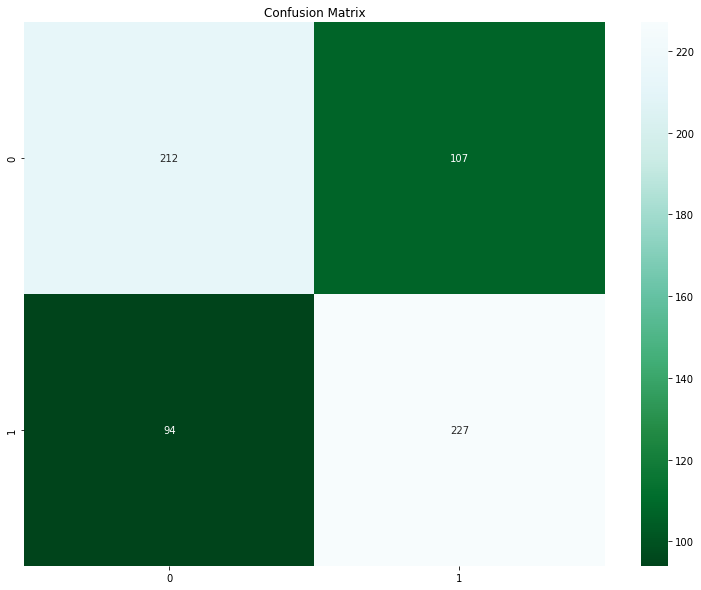

In [65]:
analyze(gb)

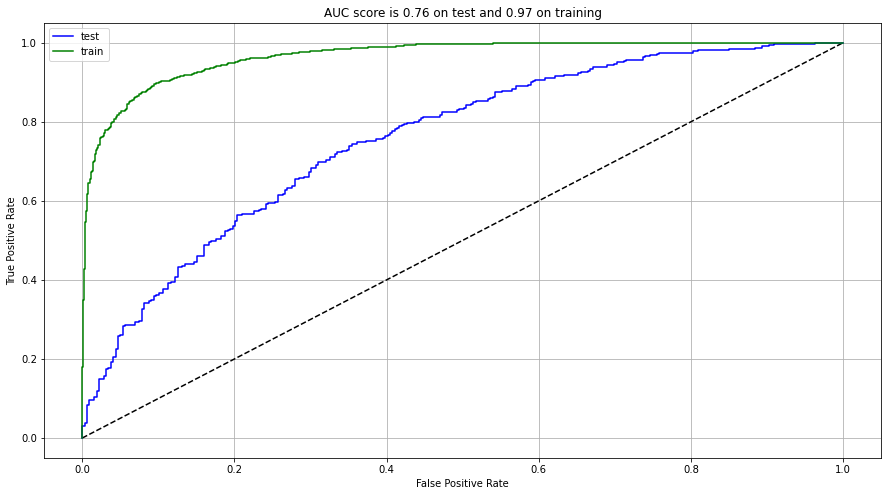

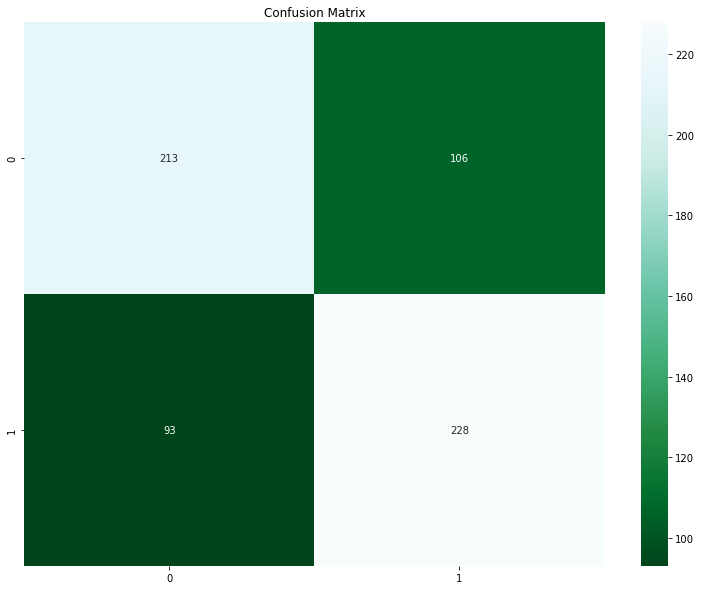

In [66]:
analyze(rf)

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import itertools as it

from operator import itemgetter

with open('gb_V2.pkl' , 'rb') as f:
    gb = pickle.load(f)
    
dfs = pd.read_html(r"https://en.wikipedia.org/wiki/2022_FIFA_World_Cup#Teams")

table = {'A': [['Qatar', 0, []],
  ['Ecuador', 0, []],
  ['Senegal', 0, []],
  ['Netherlands', 0, []]],
 'B': [['England', 0, []],
  ['Iran', 0, []],
  ['United States', 0, []],
  ['Wales', 0, []]],
 'C': [['Argentina', 0, []],
  ['Saudi Arabia', 0, []],
  ['Mexico', 0, []],
  ['Poland', 0, []]],
 'D': [['France', 0, []],
  ['Australia', 0, []],
  ['Denmark', 0, []],
  ['Tunisia', 0, []]],
 'E': [['Spain', 0, []],
  ['Costa Rica', 0, []],
  ['Germany', 0, []],
  ['Japan', 0, []]],
 'F': [['Belgium', 0, []],
  ['Canada', 0, []],
  ['Morocco', 0, []],
  ['Croatia', 0, []]],
 'G': [['Brazil', 0, []],
  ['Serbia', 0, []],
  ['Switzerland', 0, []],
  ['Cameroon', 0, []]],
 'H': [['Portugal', 0, []],
  ['Ghana', 0, []],
  ['Uruguay', 0, []],
  ['South Korea', 0, []]]}

# method of generating matches by [caiyongji], you can search me by google
# welcome to follow me by wechat official account: [caiyongji]

matches = []
for k in table:
    v = table[k]
    l = []
    for i in v:
        l.append(i[0])
    for e in it.combinations(l, 2):
        matches.append((k,e[0],e[1]))
    
table

{'A': [['Qatar', 0, []],
  ['Ecuador', 0, []],
  ['Senegal', 0, []],
  ['Netherlands', 0, []]],
 'B': [['England', 0, []],
  ['Iran', 0, []],
  ['United States', 0, []],
  ['Wales', 0, []]],
 'C': [['Argentina', 0, []],
  ['Saudi Arabia', 0, []],
  ['Mexico', 0, []],
  ['Poland', 0, []]],
 'D': [['France', 0, []],
  ['Australia', 0, []],
  ['Denmark', 0, []],
  ['Tunisia', 0, []]],
 'E': [['Spain', 0, []],
  ['Costa Rica', 0, []],
  ['Germany', 0, []],
  ['Japan', 0, []]],
 'F': [['Belgium', 0, []],
  ['Canada', 0, []],
  ['Morocco', 0, []],
  ['Croatia', 0, []]],
 'G': [['Brazil', 0, []],
  ['Serbia', 0, []],
  ['Switzerland', 0, []],
  ['Cameroon', 0, []]],
 'H': [['Portugal', 0, []],
  ['Ghana', 0, []],
  ['Uruguay', 0, []],
  ['South Korea', 0, []]]}

In [68]:
matches[:5]

[('A', 'Qatar', 'Ecuador'),
 ('A', 'Qatar', 'Senegal'),
 ('A', 'Qatar', 'Netherlands'),
 ('A', 'Ecuador', 'Senegal'),
 ('A', 'Ecuador', 'Netherlands')]

In [69]:
base_df = pd.read_csv("team_stats.csv")
base_df.columns

Index(['date', 'team', 'score', 'suf_score', 'rank', 'rank_suf', 'rank_change',
       'total_points', 'result', 'rank_dif', 'points_by_rank', 'team_points'],
      dtype='object')

In [70]:
def find_stats(team_1):
#team_1 = "Qatar"
    past_games = base_df[(base_df["team"] == team_1)].sort_values("date")
    last5 = base_df[(base_df["team"] == team_1)].sort_values("date").tail(5)

    team_1_rank = past_games["rank"].values[-1]
    team_1_goals = past_games.score.mean()
    team_1_goals_l5 = last5.score.mean()
    team_1_goals_suf = past_games.suf_score.mean()
    team_1_goals_suf_l5 = last5.suf_score.mean()
    team_1_rank_suf = past_games.rank_suf.mean()
    team_1_rank_suf_l5 = last5.rank_suf.mean()
    team_1_gp_rank = past_games.points_by_rank.mean()
    team_1_gp_rank_l5 = last5.points_by_rank.mean()

    return [team_1_rank, team_1_goals, team_1_goals_l5, team_1_goals_suf, team_1_goals_suf_l5, team_1_rank_suf, team_1_rank_suf_l5, team_1_gp_rank, team_1_gp_rank_l5]

def find_features(team_1, team_2):
    rank_dif = team_1[0] - team_2[0]
    goals_dif = team_1[1] - team_2[1]
    goals_dif_l5 = team_1[2] - team_2[2]
    goals_suf_dif = team_1[3] - team_2[3]
    goals_suf_dif_l5 = team_1[4] - team_2[4]
    goals_per_ranking_dif = (team_1[1]/team_1[5]) - (team_2[1]/team_2[5])
    dif_rank_agst = team_1[5] - team_2[5]
    dif_rank_agst_l5 = team_1[6] - team_2[6]
    dif_gp_rank = team_1[7] - team_2[7]
    dif_gp_rank_l5 = team_1[8] - team_2[8]
    
    return [rank_dif, goals_dif, goals_dif_l5, goals_suf_dif, goals_suf_dif_l5, goals_per_ranking_dif, dif_rank_agst, dif_rank_agst_l5, dif_gp_rank, dif_gp_rank_l5, 1, 0]

advanced_group = []
last_group = ""
thresh = 0.05

for k in table.keys():
    for t in table[k]:
        t[1] = 0
        t[2] = []
        
for teams in matches:
    draw = False
    team_1 = find_stats(teams[1])
    team_2 = find_stats(teams[2])

    

    features_g1 = find_features(team_1, team_2)
    features_g2 = find_features(team_2, team_1)

    probs_g1 = gb.predict_proba([features_g1])
    probs_g2 = gb.predict_proba([features_g2])
    
    team_1_prob_g1 = probs_g1[0][0]
    team_1_prob_g2 = probs_g2[0][1]
    team_2_prob_g1 = probs_g1[0][1]
    team_2_prob_g2 = probs_g2[0][0]

    team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
    team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
    
    if ((team_1_prob_g1 > team_2_prob_g1) & (team_2_prob_g2 > team_1_prob_g2)) | ((team_1_prob_g1 < team_2_prob_g1) & (team_2_prob_g2 < team_1_prob_g2)):
        draw=True
        for i in table[teams[0]]:
            if i[0] == teams[1] or i[0] == teams[2]:
                i[1] += 1
                
    elif team_1_prob > team_2_prob:
        winner = teams[1]
        winner_proba = team_1_prob
        for i in table[teams[0]]:
            if i[0] == teams[1]:
                i[1] += 3
                
    elif team_2_prob > team_1_prob:  
        winner = teams[2]
        winner_proba = team_2_prob
        for i in table[teams[0]]:
            if i[0] == teams[2]:
                i[1] += 3
    
    for i in table[teams[0]]: #adding criterio de desempate (probs por jogo)
            if i[0] == teams[1]:
                i[2].append(team_1_prob)
            if i[0] == teams[2]:
                i[2].append(team_2_prob)

    if last_group != teams[0]:
        if last_group != "":
            print("\n")
            print("Group %s advanced: "%(last_group))
            
            for i in table[last_group]: #adding crieterio de desempate
                i[2] = np.mean(i[2])
            
            final_points = table[last_group]
            final_table = sorted(final_points, key=itemgetter(1, 2), reverse = True)
            advanced_group.append([final_table[0][0], final_table[1][0]])
            for i in final_table:
                print("%s -------- %d"%(i[0], i[1]))
        print("\n")
        print("-"*10+" Starting Analysis for Group %s "%(teams[0])+"-"*10)
        
        
    if draw == False:
        print("Group %s - %s vs. %s: Winner %s with %.2f probability"%(teams[0], teams[1], teams[2], winner, winner_proba))
    else:
        print("Group %s - %s vs. %s: Draw"%(teams[0], teams[1], teams[2]))
    last_group =  teams[0]

print("\n")
print("Group %s advanced: "%(last_group))

for i in table[last_group]: #adding crieterio de desempate
    i[2] = np.mean(i[2])
            
final_points = table[last_group]
final_table = sorted(final_points, key=itemgetter(1, 2), reverse = True)
advanced_group.append([final_table[0][0], final_table[1][0]])
for i in final_table:
    print("%s -------- %d"%(i[0], i[1]))




---------- Starting Analysis for Group A ----------
Group A - Qatar vs. Ecuador: Winner Ecuador with 0.62 probability
Group A - Qatar vs. Senegal: Winner Senegal with 0.60 probability
Group A - Qatar vs. Netherlands: Winner Netherlands with 0.78 probability
Group A - Ecuador vs. Senegal: Draw
Group A - Ecuador vs. Netherlands: Winner Netherlands with 0.73 probability
Group A - Senegal vs. Netherlands: Winner Netherlands with 0.62 probability


Group A advanced: 
Netherlands -------- 9
Senegal -------- 4
Ecuador -------- 4
Qatar -------- 0


---------- Starting Analysis for Group B ----------
Group B - England vs. Iran: Winner England with 0.62 probability
Group B - England vs. United States: Winner England with 0.61 probability
Group B - England vs. Wales: Winner England with 0.64 probability
Group B - Iran vs. United States: Winner United States with 0.58 probability
Group B - Iran vs. Wales: Draw
Group B - United States vs. Wales: Draw


Group B advanced: 
England -------- 9
United

In [71]:
advanced = advanced_group
playoffs = {"Round of 16": [], "Quarter-Final": [], "Semi-Final": [], "Final": []}

for p in playoffs.keys():
    playoffs[p] = []

actual_round = ""
next_rounds = []

for p in playoffs.keys():
    if p == "Round of 16":
        control = []
        for a in range(0, len(advanced*2), 1):
            if a < len(advanced):
                if a % 2 == 0:
                    control.append((advanced*2)[a][0])
                else:
                    control.append((advanced*2)[a][1])
            else:
                if a % 2 == 0:
                    control.append((advanced*2)[a][1])
                else:
                    control.append((advanced*2)[a][0])

        playoffs[p] = [[control[c], control[c+1]] for c in range(0, len(control)-1, 1) if c%2 == 0]
        
        for i in range(0, len(playoffs[p]), 1):
            game = playoffs[p][i]
            
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)

            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)
            
            probs_g1 = gb.predict_proba([features_g1])
            probs_g2 = gb.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
            if actual_round != p:
                print("-"*10)
                print("Starting simulation of %s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, away, team_2_prob))
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, home, team_1_prob))
                next_rounds.append(home)
            
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p
        
    else:
        playoffs[p] = [[next_rounds[c], next_rounds[c+1]] for c in range(0, len(next_rounds)-1, 1) if c%2 == 0]
        next_rounds = []
        for i in range(0, len(playoffs[p])):
            game = playoffs[p][i]
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)
            
            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)
            
            probs_g1 = gb.predict_proba([features_g1])
            probs_g2 = gb.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
            if actual_round != p:
                print("-"*10)
                print("Starting simulation of %s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, away, team_2_prob))
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, home, team_1_prob))
                next_rounds.append(home)
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p
            

----------
Starting simulation of Round of 16
----------


Netherlands vs. United States: Netherlands advances with prob 0.54
Argentina vs. Denmark: Argentina advances with prob 0.59
Spain vs. Croatia: Spain advances with prob 0.61
Brazil vs. Uruguay: Brazil advances with prob 0.64
Senegal vs. England: England advances with prob 0.64
Poland vs. France: France advances with prob 0.67
Germany vs. Belgium: Belgium advances with prob 0.53
Switzerland vs. Portugal: Portugal advances with prob 0.57
----------
Starting simulation of Quarter-Final
----------


Netherlands vs. Argentina: Netherlands advances with prob 0.51
Spain vs. Brazil: Brazil advances with prob 0.54
England vs. France: England advances with prob 0.51
Belgium vs. Portugal: Portugal advances with prob 0.52
----------
Starting simulation of Semi-Final
----------


Netherlands vs. Brazil: Brazil advances with prob 0.55
England vs. Portugal: England advances with prob 0.51
----------
Starting simulation of Final
----------


Br

In [1]:
#  base_df[base_df["team"] == "Brazil"]